# Unveiling the Dynamics of Housing Market in Northwestern County

## 1. Business Understanding

### Data Analytic Question

Seldovatt Realtors is a company that perform duties, such as study property listings, interview prospective clients, accompany clients to property site, discuss conditions of sale, and draw up real estate contracts.The company is looking for valuable insights that influence house prices in Northwastern County.

### Problem statement

Identifying underlying factors driving house prices in Northwestern County by conducting a comprehensive analysis using historical sales data and employing multiple linear regression to identify the significant factors affecting house prices and build a reliable predictive model.

## 2. Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv. The description of the column names can be found in column_names.md. We've used the following features to analyze the dataset:

* id
* price
* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* floors
* waterfront
* grade
* yr_built
* condition

## 3. Data Preparation

In [42]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the dataset
data = pd.read_csv('kc_house_data.csv', index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
# Copy the features being used to a separate dataset
house_data = data[['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living', 'floors', 'waterfront', 'grade', 'yr_built', 'condition']]
house_data

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,grade,yr_built,condition
id,,,,,,,,,,
7129300520,221900.0,3,1.00,5650,1180,1.0,NaN,7 Average,1955,Average
6414100192,538000.0,3,2.25,7242,2570,2.0,NO,7 Average,1951,Average
5631500400,180000.0,2,1.00,10000,770,1.0,NO,6 Low Average,1933,Average
2487200875,604000.0,4,3.00,5000,1960,1.0,NO,7 Average,1965,Very Good
1954400510,510000.0,3,2.00,8080,1680,1.0,NO,8 Good,1987,Average
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1131,1530,3.0,NO,8 Good,2009,Average
6600060120,400000.0,4,2.50,5813,2310,2.0,NO,8 Good,2014,Average
1523300141,402101.0,2,0.75,1350,1020,2.0,NO,7 Average,2009,Average


In [44]:
# Identifying the Missing Data
house_data.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_lot       0
sqft_living    0
floors         0
waterfront     0
grade          0
yr_built       0
condition      0
dtype: int64

In [45]:
# Drop the NaN values
house_data.dropna(axis=0, inplace=True)

In [46]:
# Check data types of each column
house_data.describe()

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,yr_built
count,1.922100e+04,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000
mean,5.416398e+05,3.374642,2.117072,1.507376e+04,2082.420894,1.495031,1971.039800
std,3.722478e+05,0.928539,0.769576,4.081729e+04,922.544859,0.540155,29.384666
min,7.800000e+04,1.000000,0.500000,5.200000e+02,370.000000,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1430.000000,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,7.620000e+03,1920.000000,1.500000,1975.000000
75%,6.440000e+05,4.000000,2.500000,1.071600e+04,2550.000000,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,13540.000000,3.500000,2015.000000


In [47]:
# inspect the value counts for the categorical features
categoricals = house_data.select_dtypes("object")

for col in categoricals:
    print(house_data[col].value_counts(), "\n")

NO     19075
YES      146
Name: waterfront, dtype: int64 

7 Average        7974
8 Good           5409
9 Better         2320
6 Low Average    1810
10 Very Good     1018
11 Excellent      357
5 Fair            212
12 Luxury          82
4 Low              25
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 

Average      12474
Good          5058
Very Good     1512
Fair           152
Poor            25
Name: condition, dtype: int64 



In [48]:
house_data.corr()['price']

C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\3099983700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_data.corr()['price']


price          1.000000
bedrooms       0.309651
bathrooms      0.527350
sqft_lot       0.087005
sqft_living    0.704652
floors         0.258277
yr_built       0.053525
Name: price, dtype: float64

## 4. Modeling

### A. Building a simple linear regression model

In [96]:
X_baseline = house_data['sqft_living']
y = house_data['price']

In [97]:
# Import statsmodels, fitting the model
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:27:53   Log-Likelihood:            -2.6723e+05
No. Observations:               19221   AIC:                         5.345e+05
Df Residuals:                   19219   BIC:                         5.345e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.045e+04   4703.746    -10.726      

### Model Interpretetion
* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 50% of the variance in price
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* If a sqft_living of 0 square feet, we would expect price to be about -50 449 Kenyan Shillings
* For each increase of 1 square foot of the house sqft_living, we see an associated increase in SalePrcie of about 284 Kenyan Shillings

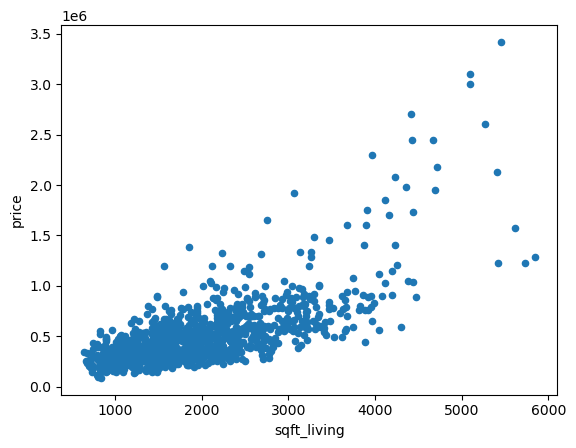

In [51]:
# Plot a sample of 1000 data points, most_correlated vs. price
house_data.sample(1000, random_state=1).plot.scatter(x="sqft_living", y="price");

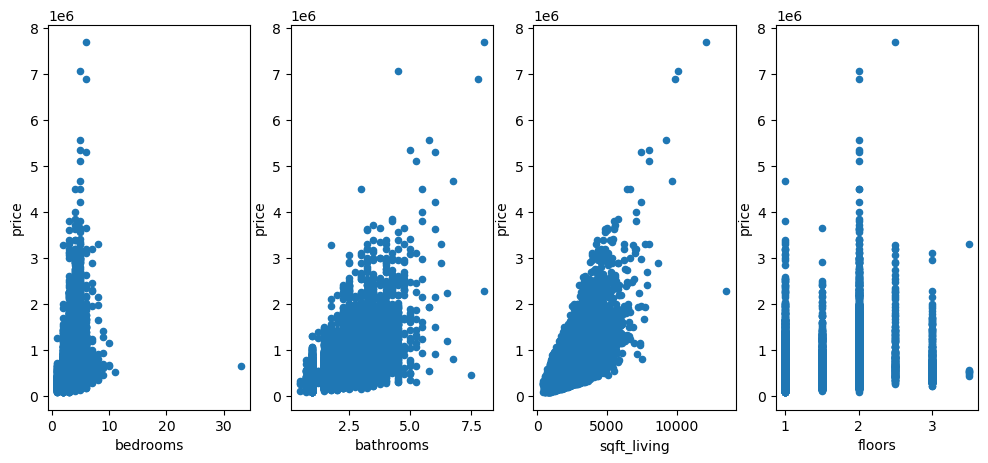

In [98]:
# Identify and visualize numeric and categorical predictor
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12,5))

data.plot.scatter(x="bedrooms", y="price", ax=ax1)
data.plot.scatter(x="bathrooms", y="price", ax=ax2)
data.plot.scatter(x="sqft_living", y="price", ax=ax3)
data.plot.scatter(x="floors", y="price", ax=ax4);

C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\1607729574.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  house_data.groupby(feature).mean().plot.bar(
C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\1607729574.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  house_data.groupby(feature).mean().plot.bar(
C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\1607729574.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid 

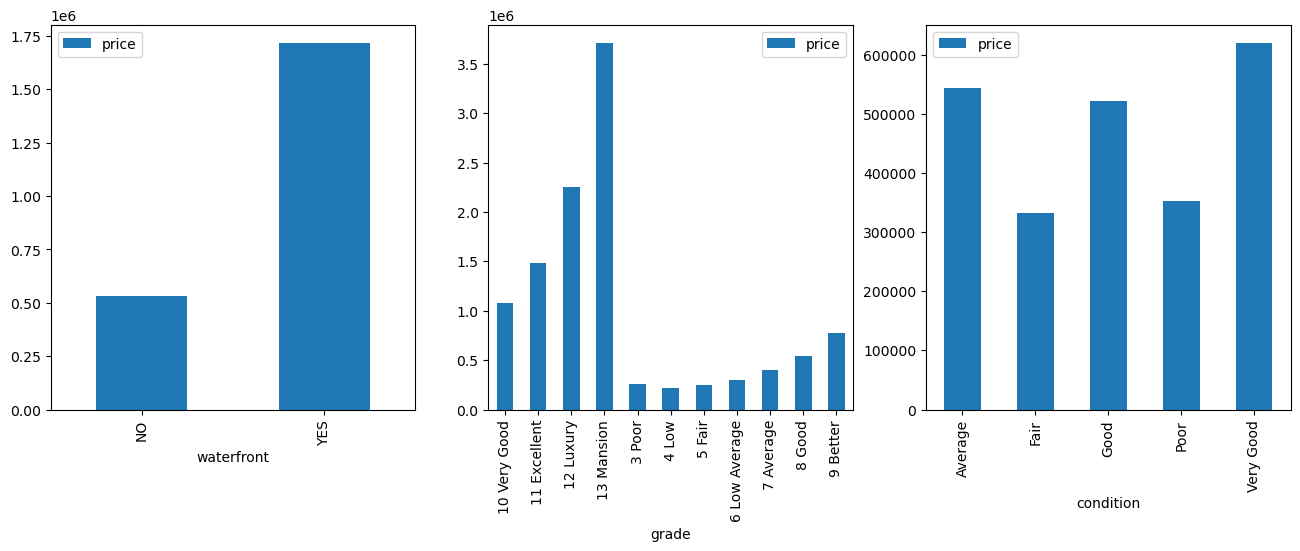

In [64]:
categorical_features = house_data.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(16,5))

for index, feature in enumerate(categorical_features):
    house_data.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

### B. Building a multiple linear regression model

In [137]:
# preparing y and x for modeling
y = data["price"]
X = data[["sqft_living", "grade", "floors", "bedrooms"]]

# split grade
X["Grade"] = X["grade"].str.split().apply(lambda x: x[1])
X.drop(['grade'], axis=1, inplace=True)

# Creating a dummy variable for Grade
X = pd.get_dummies(X, columns=["Grade"], drop_first=True)
X

C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\86949107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Grade"] = X["grade"].str.split().apply(lambda x: x[1])
C:\Users\Frankline\AppData\Local\Temp\ipykernel_30764\86949107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['grade'], axis=1, inplace=True)


,sqft_living,floors,bedrooms,Grade_Better,Grade_Excellent,Grade_Fair,Grade_Good,Grade_Low,Grade_Luxury,Grade_Mansion,Grade_Poor,Grade_Very
id,,,,,,,,,,,,
7129300520,1180,1.0,3,0,0,0,0,0,0,0,0,0
6414100192,2570,2.0,3,0,0,0,0,0,0,0,0,0
5631500400,770,1.0,2,0,0,0,0,1,0,0,0,0
2487200875,1960,1.0,4,0,0,0,0,0,0,0,0,0
1954400510,1680,1.0,3,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1530,3.0,3,0,0,0,1,0,0,0,0,0
6600060120,2310,2.0,4,0,0,0,1,0,0,0,0,0
1523300141,1020,2.0,2,0,0,0,0,0,0,0,0,0


In [138]:
# fit model and display results
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2534.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:06:02   Log-Likelihood:            -2.9790e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21584   BIC:                         5.959e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.119e+05   8045.439     26.334      0.000    1.96e+05    2.28e+05
sqft_living       176.1228      3.283     53.643      0.000     169.687     182.558
floors          -2.454e+04   3422.194     -7.170      0.000   -3.12e+04   -1.78e+04
bedrooms        -2.303e+04   2216.928    -10.386      0.000   -2.74e+04   -1.87e+04
Grade_Better      1.89e+05   6513.814     29.011      0.000    1.76e+05    2.02e+05
Grade_Excellent  6.557e+05   1.47e+04     44.742      0.000    6.27e+05    6.84e+05
Grade_Fair      -5.487e+04   1.56e+04     -3.523      0.000   -8.54e+04   -2.43e+04
Grade_Good       6.741e+04   4361.558     15.456      0.000    5.89e+04     7.6e+04
Grade_Low       -3.112e+04   5990.353     -5.195      0.000   -4.29e+04   -1.94e+04
Grade_Luxury     1.172e+06   2.77e+04     42.240      0.000    1.12e+06    1.23e+06
Grade_Mansion    2.341e+06    6.8e+04     34.423      0.000    2.21e+06    2.47e+06
Grade_Poor       6107.7241   2.37e+05      0.026      0.979   -4.58e+05     4.7e+05
Grade_Very       3.769e+05   9388.940     40.141      0.000    3.58e+05    3.95e+05
==============================================================================
Omnibus:                    13640.151   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446240.854
Skew:                           2.528   Prob(JB):                         0.00
Kurtosis:                      24.687   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model interpretation

* The model is statistically significant overall with a F-statistic p-value beliw 0.05
* The model explains about 59% of the variance in house price (adjusted R-Squared 0.585)
* most of the model coefficients are statistically significant with t-statistic p-values well below 0.05 except Grade_poor
* If the predictors are 0 , we would expect price to be about 211,700 Kenyan Shillings

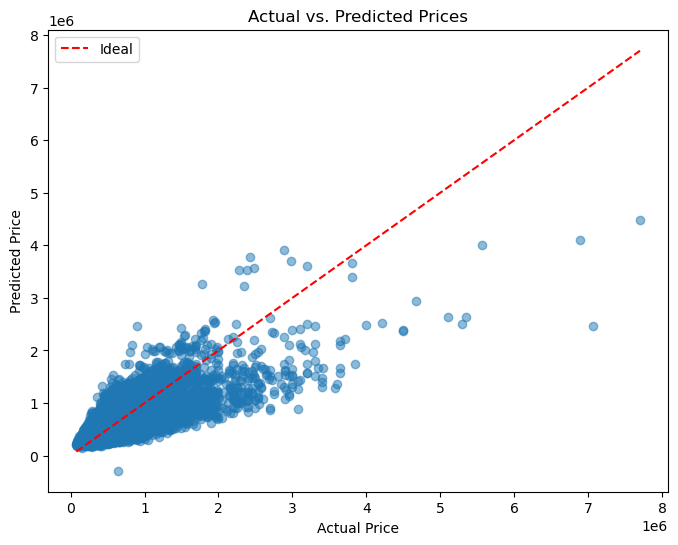

In [139]:
# Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y, results.predict(), alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

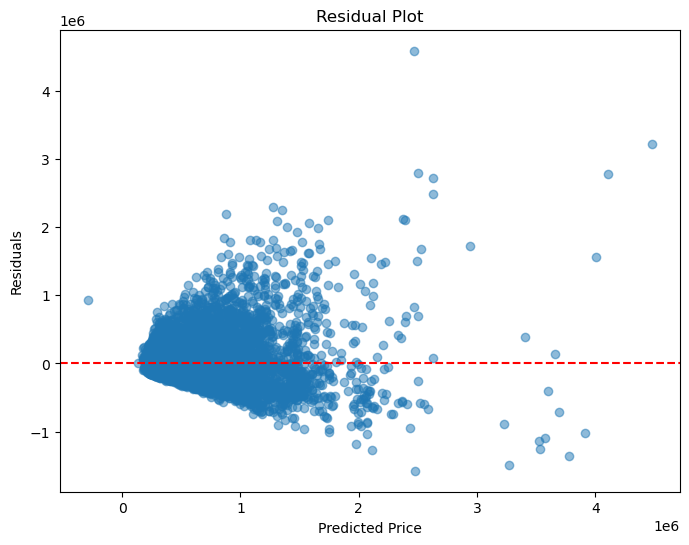

In [120]:
# Residual Plot
plt.figure(figsize=(8, 6))
residuals = results.resid
predicted = results.predict()
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

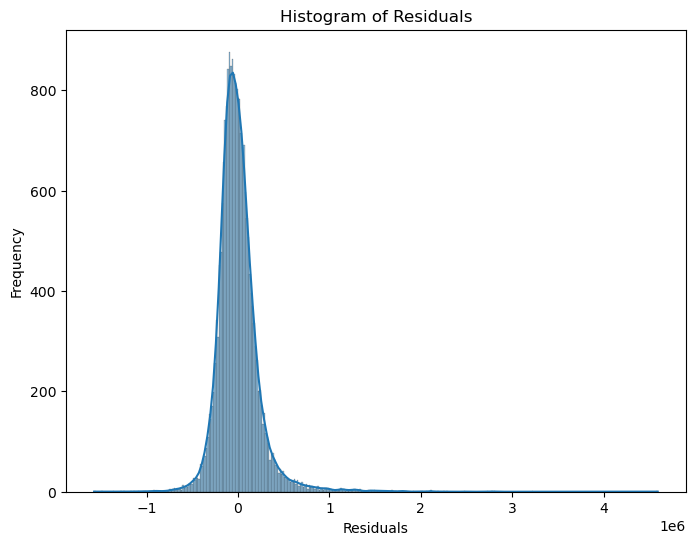

In [121]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

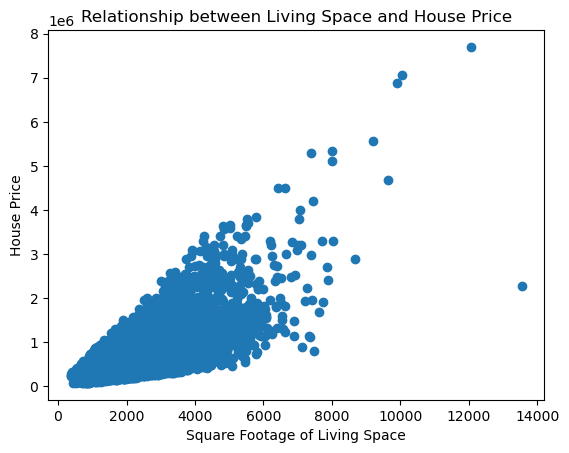

In [122]:
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.title('Relationship between Living Space and House Price')
plt.show()

## 5. Regression Results

* The R_squared value indicated the model's goodness of fit
* The F_statistic is statistically significant since it's less than 0.05
* The regression coefficients provide insights into the magnitude and direction of the relationship between the predictor variable and house prices
* The Adjusted R-squared accounts for the number of predictors in the model, yielding a value of 0.585